In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob

# Classify using reservoir causality data

In [2]:
# load computed causality matrices
con_files = [f for f in glob.glob("data/sub-CON*.npy")]
pat_files = [f for f in glob.glob("data/sub-PAT*.npy")]

# filter out excluded subjects
excluded = ["PAT08", "CON03", "PAT03", "PAT11"]
con_files = [f for f in con_files if f[9:14] not in excluded]
pat_files = [f for f in pat_files if f[9:14] not in excluded]

# transform for LDA
con_causalities = np.array([np.load(f) for f in con_files])
pat_causalities = np.array([np.load(f) for f in pat_files])
con_flattened = con_causalities.reshape((con_causalities.shape[0], -1))
pat_flattened = pat_causalities.reshape((pat_causalities.shape[0], -1))

In [3]:
# causality = np.load("data/sub-PAT14_ses-preop_task-rest_space-MNI152NLin2009cAsym_atlas-Gordon_desc-timeseries_bold_causality_matrix.npy")
# plt.figure(figsize=(10,10))
# plt.imshow(causality, cmap='hot')

In [9]:
# perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# use SVM
from sklearn.svm import SVC

lda = LinearDiscriminantAnalysis()
svc = SVC(kernel='rbf')


_xs = np.concatenate((con_flattened, pat_flattened))
_ys = np.concatenate((np.zeros(con_flattened.shape[0]), np.ones(pat_flattened.shape[0])))
# replace nans in _xs with 0
_xs[np.isnan(_xs)] = 0

# 2-fold cross-validation (randomized)
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=4, test_size=0.5, random_state=0)

lda_coefs = []
for train_index, test_index in ss.split(_xs, _ys):
    X_train, X_test = _xs[train_index], _xs[test_index]
    y_train, y_test = _ys[train_index], _ys[test_index]
    lda.fit(X_train, y_train)
    svc.fit(X_train, y_train)

    print("LDA score:", lda.score(X_test, y_test), "  SVC score: ", svc.score(X_test, y_test))

    # y_pred = lda.predict(X_test)
    # y_pred = svc.predict(X_test)
    # print(y_pred) 
    # print(y_test)

    # coefs = lda.coef_.reshape((con_causalities.shape[1], con_causalities.shape[2]))
    # plt.figure(figsize=(10,10))
    # plt.imshow(coefs, cmap='hot')
    # lda_coefs.append(lda.coef_)

# # correlation between coefficients
# lda_robustness = np.corrcoef(lda_coefs[0], lda_coefs[1])[0, 1]
# print("\nLDA robustness: ", lda_robustness)

LDA score: 0.4   SVC score:  0.3
LDA score: 0.3   SVC score:  0.3
LDA score: 0.3   SVC score:  0.5
LDA score: 0.4   SVC score:  0.4


In [5]:
# coefs = lda.coef_.reshape((con_causalities.shape[1], con_causalities.shape[2]))
# plt.figure(figsize=(10,10))
# plt.imshow(coefs, cmap='hot')

# Classify using region correlations

In [6]:
con_fmri_files = [f[:-21] + ".tsv" for f in con_files]
pat_fmri_files = [f[:-21] + ".tsv" for f in pat_files]

In [7]:
con_corr_matrices = []
for filename in con_fmri_files:
    df = pd.read_csv(filename, header=None)
    data = np.array(df)
    correlation_matrix = np.corrcoef(data.T)
    con_corr_matrices.append(correlation_matrix)
pat_corr_matrices = []
for filename in pat_fmri_files:
    df = pd.read_csv(filename, header=None)
    data = np.array(df)
    correlation_matrix = np.corrcoef(data.T)
    pat_corr_matrices.append(correlation_matrix)

# flatten for LDA
con_correlations = np.array(con_corr_matrices)
pat_correlations = np.array(pat_corr_matrices)
con_flattened = con_correlations.reshape((con_correlations.shape[0], -1))
pat_flattened = pat_correlations.reshape((pat_correlations.shape[0], -1))

/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/lib/python3.10/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/l

In [8]:
# perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# use SVM
from sklearn.svm import SVC

lda = LinearDiscriminantAnalysis()
svc = SVC(kernel='rbf')

_xs = np.concatenate((con_flattened, pat_flattened))
_ys = np.concatenate((np.zeros(con_flattened.shape[0]), np.ones(pat_flattened.shape[0])))
# replace nans in _xs with 0
_xs[np.isnan(_xs)] = 0

# 2-fold cross-validation (randomized)
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=4, test_size=0.5, random_state=4)

lda_coefs = []
for train_index, test_index in ss.split(_xs, _ys):
    X_train, X_test = _xs[train_index], _xs[test_index]
    y_train, y_test = _ys[train_index], _ys[test_index]

    lda.fit(X_train, y_train)
    svc.fit(X_train, y_train)

    print("LDA score:", lda.score(X_test, y_test), "  SVC score: ", svc.score(X_test, y_test))

    # print(y_pred) 
    # print(y_test)

    # coefs = lda.coef_.reshape((con_causalities.shape[1], con_causalities.shape[2]))
    # plt.figure(figsize=(10,10))
    # plt.imshow(coefs, cmap='hot')
    lda_coefs.append(lda.coef_)

# # correlation between coefficients
# lda_robustness = np.corrcoef(lda_coefs[0], lda_coefs[1])[0, 1]
# print("\nLDA robustness: ", lda_robustness)

LDA score: 0.1   SVC score:  0.4
LDA score: 0.2   SVC score:  0.3
LDA score: 0.6   SVC score:  0.5
LDA score: 0.4   SVC score:  0.5


# Visualize causalities

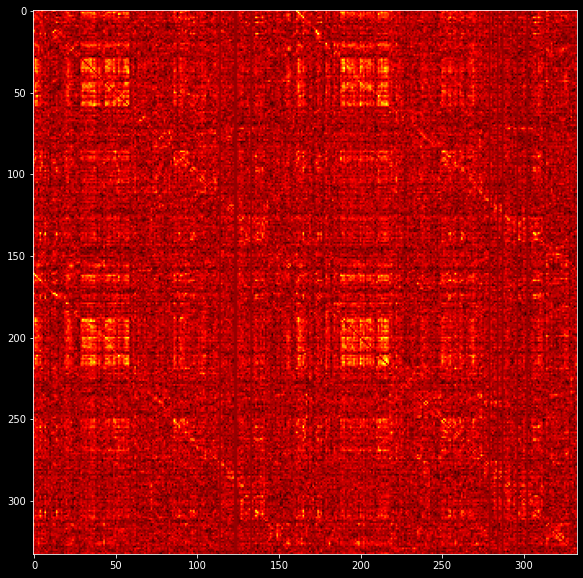

In [14]:
avg_con_causality = con_causalities.mean(axis=0)
avg_con_causality[np.isnan(avg_con_causality)] = 0

plt.figure(figsize=(10,10))
plt.imshow(avg_con_causality, cmap='hot')

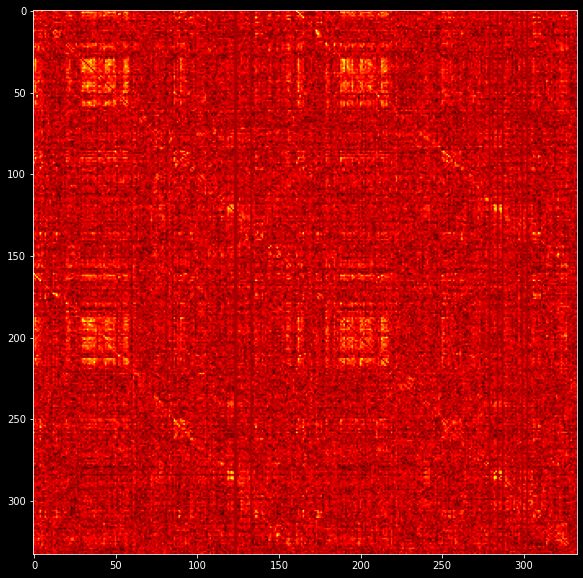

In [16]:
avg_pat_causality = pat_causalities.mean(axis=0)
avg_pat_causality[np.isnan(avg_pat_causality)] = 0

plt.figure(figsize=(10,10))
plt.imshow(avg_pat_causality, cmap='hot')